In [15]:
#Some magic here, see https://stackoverflow.com/questions/20961287/what-is-pylab
#But might be better to type just what's needed rather than this which imports bunch of stuff
#%pylab inline  didn't work for plot, try alternative - works, just added plt.scatter infinal plot line

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Import fcsparser and set the filepath

import fcsparser

path = fcsparser.test_sample_path

In [17]:
#Just unpack the metadata
meta = fcsparser.parse(path, meta_data_only=True)
print(type(meta))
print(meta.keys())

<class 'dict'>
dict_keys(['__header__', '$BEGINANALYSIS', '$ENDANALYSIS', '$BEGINSTEXT', '$ENDSTEXT', '$BEGINDATA', '$ENDDATA', '$FIL', '$SYS', '$TOT', '$PAR', '$MODE', '$BYTEORD', '$DATATYPE', '$NEXTDATA', 'CREATOR', 'TUBE NAME', '$SRC', 'EXPERIMENT NAME', 'GUID', '$DATE', '$BTIM', '$ETIM', '$CYT', 'CYTNUM', 'WINDOW EXTENSION', 'EXPORT USER NAME', 'EXPORT TIME', '$OP', 'FSC ASF', 'AUTOBS', '$INST', 'LASER1NAME', 'LASER1DELAY', 'LASER1ASF', 'LASER2NAME', 'LASER2DELAY', 'LASER2ASF', 'LASER3NAME', 'LASER3DELAY', 'LASER3ASF', 'LASER4NAME', 'LASER4DELAY', 'LASER4ASF', 'PLATE NAME', 'WELL ID', 'PLATE ID', '$TIMESTEP', 'SPILL', 'APPLY COMPENSATION', 'THRESHOLD', '$P1N', '$P1R', '$P1B', '$P1E', '$P1V', '$P1G', 'P1DISPLAY', 'P1BS', 'P1MS', '$P2N', '$P2R', '$P2B', '$P2E', '$P2V', '$P2G', 'P2DISPLAY', 'P2BS', 'P2MS', '$P3N', '$P3R', '$P3B', '$P3E', '$P3V', '$P3G', 'P3BS', 'P3MS', '$P4N', '$P4R', '$P4B', '$P4E', '$P4V', '$P4G', 'P4DISPLAY', 'P4BS', 'P4MS', '$P5N', '$P5R', '$P5B', '$P5E', '$P5V', 

In [18]:
#Unpack and reformat metadata
meta = fcsparser.parse(path, meta_data_only=True, reformat_meta=True)
meta['_channels_']

,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG
Channel Number,,,,,,
1,FSC-A,262144,32,"[0, 0]",611,1.0
2,FSC-H,262144,32,"[0, 0]",611,1.0
3,FSC-W,262144,32,"[0, 0]",611,1.0
4,SSC-A,262144,32,"[0, 0]",210,1.0
5,SSC-H,262144,32,"[0, 0]",210,1.0
6,SSC-W,262144,32,"[0, 0]",210,1.0
7,FITC-A,262144,32,"[0, 0]",580,1.0
8,PerCP-Cy5-5-A,262144,32,"[0, 0]",580,1.0
9,AmCyan-A,262144,32,"[0, 0]",550,1.0


In [19]:
#Unpack meta and data
meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)

print(type(meta))
print(type(data))

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
data

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FITC-A,PerCP-Cy5-5-A,AmCyan-A,PE-TxRed YG-A,Time
0,-28531.250000,10.0,0.0,700.149963,1656.0,27708.351562,98.799995,54.149998,164.220001,120.360001,0.200000
1,-49414.878906,8.0,0.0,1275.849976,2278.0,36705.050781,155.800003,13.300000,161.840012,94.860001,0.400000
2,-58684.320312,14.0,0.0,-512.049988,472.0,0.000000,22.799999,8.550000,172.550003,85.680000,0.500000
3,-3857.839844,432.0,0.0,276.449982,1339.0,13530.564453,-49.399998,34.200001,157.080002,89.759995,0.700000
4,22825.830078,4606.0,262143.0,-505.399994,472.0,0.000000,90.250000,9.500000,330.820007,76.500000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...
14940,-28177.669922,4.0,0.0,1650.150024,1551.0,69725.484375,157.699997,398.049988,1391.110107,2730.540039,1002.700012
14941,-19354.769531,7.0,0.0,1086.799927,1073.0,66378.867188,56.049999,-12.349999,-15.470001,-14.280000,1002.700012
14942,12428.419922,2658.0,262143.0,496.850006,496.0,65648.312500,-24.699999,-9.500000,10.710001,-7.140000,1002.700012
14943,21995.000000,4392.0,262143.0,558.599976,514.0,71222.585938,67.449997,-12.349999,14.280001,-5.100000,1002.700012


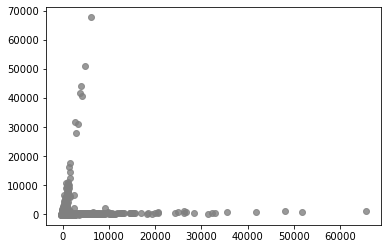

In [21]:
#Visualise untransformed data
#The plot below is a plot of the raw data as recorded in the file. Specifically, no compensation or transformation has been applied to this data.
#To better visualize this data you might want to take a look at either hlog or logicle transformations.
plt.scatter(data['FITC-A'], data['AmCyan-A'], alpha=0.8, color='gray')